Dictionaries and sets

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
def read_shapefiles(urban_shp_path, yuc_shp_path):
    urban_2010 = gpd.read_file(urban_shp_path)
    yuc_2020 = gpd.read_file(yuc_shp_path)
    return urban_2010, yuc_2020

def extract_municipality_data(gdf, cve_mun='050', cve_ent=None):
    if cve_ent:
        gdf = gdf[gdf['CVE_ENT'] == cve_ent]
    return gdf[gdf['CVE_MUN'] == cve_mun]

def compare_agebs(urban_data, yuc_data):
    urban_set = set(urban_data['CVEGEO'])
    yuc_set = set(yuc_data['CVEGEO'])

    return {
        'remains': urban_set & yuc_set,
        'new': yuc_set - urban_set,
        'disappeared': urban_set - yuc_set
    }

def plot_changes(base, new, disappeared, title):
    fig, ax = plt.subplots(figsize=(10, 10))
    base.plot(ax=ax, color='green', label='Remains 2010-2020')
    new.plot(ax=ax, color='blue', label='New in 2020')
    disappeared.plot(ax=ax, color='red', label='Disappeared 2010-2020')
    ax.set_title(title)
    ax.legend()
    plt.show()

In [7]:
# Paths to your shapefiles
urban_shp_path = '/content/mex_2010/AGEB_urb_2010_5.shp'
yuc_shp_path = '/content/yuc_2020/31a.shp'

In [8]:
# Read shapefiles
urban_2010, yuc_2020 = read_shapefiles(urban_shp_path, yuc_shp_path)

In [9]:
# Prepare data
urban_2010['CVE_ENT'] = urban_2010['CVEGEO'].str[:2]
urban_2010['CVE_MUN'] = urban_2010['CVEGEO'].str[2:5]
yuc_2010 = extract_municipality_data(urban_2010, cve_ent='31')

In [10]:
yuc_2010

,CODIGO,CVEGEO,GEOGRAFICO,FECHAACT,GEOMETRIA,INSTITUCIO,OID,geometry,CVE_ENT,CVE_MUN
53392,LA_6052,310500001516A,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53393,"POLYGON ((3779011.482 1044206.738, 3779006.208...",31,050
53393,LA_6052,3105000012625,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53394,"POLYGON ((3774738.557 1051086.957, 3774742.268...",31,050
53394,LA_6052,3105000012697,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53395,"POLYGON ((3774600.177 1053733.617, 3774614.671...",31,050
53395,LA_6052,3105000013572,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53396,"POLYGON ((3774145.121 1052822.459, 3774195.333...",31,050
53396,LA_6052,3105000015649,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53397,"POLYGON ((3774614.438 1051099.182, 3774607.695...",31,050
...,...,...,...,...,...,...,...,...,...,...
53861,LA_6052,3105001116276,ÁREA GEOESTADÍSTICA BÁSICA,09/2010,ÁREA,INEGI,53862,"POLYGON ((3776997.723 1035039.429, 3776954.642...",31,050
53862,LA_6052,3105001116280,ÁREA GEOESTADÍSTICA BÁSICA,09/2010,ÁREA,INEGI,53863,"POLYGON ((3777353.490 1035299.171, 3777357.018...",31,050
53863,LA_6052,3105001116295,ÁREA GEOESTADÍSTICA BÁSICA,09/2010,ÁREA,INEGI,53864,"POLYGON ((3777129.513 1035511.935, 3777125.534...",31,050
53864,LA_6052,3105004086596,ÁREA GEOESTADÍSTICA BÁSICA,06/2010,ÁREA,INEGI,53865,"POLYGON ((3782199.467 1045432.053, 3782254.615...",31,050


In [11]:
# Extract specific municipality data
mid_2010 = extract_municipality_data(yuc_2010)
mid_2020 = extract_municipality_data(yuc_2020)

In [12]:
mid_2010

,CODIGO,CVEGEO,GEOGRAFICO,FECHAACT,GEOMETRIA,INSTITUCIO,OID,geometry,CVE_ENT,CVE_MUN
53392,LA_6052,310500001516A,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53393,"POLYGON ((3779011.482 1044206.738, 3779006.208...",31,050
53393,LA_6052,3105000012625,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53394,"POLYGON ((3774738.557 1051086.957, 3774742.268...",31,050
53394,LA_6052,3105000012697,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53395,"POLYGON ((3774600.177 1053733.617, 3774614.671...",31,050
53395,LA_6052,3105000013572,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53396,"POLYGON ((3774145.121 1052822.459, 3774195.333...",31,050
53396,LA_6052,3105000015649,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53397,"POLYGON ((3774614.438 1051099.182, 3774607.695...",31,050
...,...,...,...,...,...,...,...,...,...,...
53861,LA_6052,3105001116276,ÁREA GEOESTADÍSTICA BÁSICA,09/2010,ÁREA,INEGI,53862,"POLYGON ((3776997.723 1035039.429, 3776954.642...",31,050
53862,LA_6052,3105001116280,ÁREA GEOESTADÍSTICA BÁSICA,09/2010,ÁREA,INEGI,53863,"POLYGON ((3777353.490 1035299.171, 3777357.018...",31,050
53863,LA_6052,3105001116295,ÁREA GEOESTADÍSTICA BÁSICA,09/2010,ÁREA,INEGI,53864,"POLYGON ((3777129.513 1035511.935, 3777125.534...",31,050
53864,LA_6052,3105004086596,ÁREA GEOESTADÍSTICA BÁSICA,06/2010,ÁREA,INEGI,53865,"POLYGON ((3782199.467 1045432.053, 3782254.615...",31,050


In [13]:
mid_2020

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
412,3105000015329,31,050,0001,5329,"POLYGON ((3779478.623 1047307.492, 3779480.973..."
413,3105000012466,31,050,0001,2466,"POLYGON ((3777875.435 1056949.722, 3777947.632..."
414,310500001249A,31,050,0001,249A,"POLYGON ((3779713.782 1053802.753, 3779711.800..."
415,3105000015827,31,050,0001,5827,"POLYGON ((3772091.762 1052572.146, 3772125.684..."
416,3105000014706,31,050,0001,4706,"POLYGON ((3772829.128 1047931.320, 3772821.774..."
...,...,...,...,...,...,...
933,3105000017039,31,050,0001,7039,"POLYGON ((3775406.523 1040943.870, 3775457.091..."
934,3105000014049,31,050,0001,4049,"POLYGON ((3775740.093 1048924.453, 3775743.166..."
935,3105000010864,31,050,0001,0864,"POLYGON ((3774665.953 1057517.934, 3774639.617..."
936,310500001085A,31,050,0001,085A,"POLYGON ((3772545.613 1046715.097, 3772453.186..."


In [14]:
# Compare AGEBs
changes = compare_agebs(mid_2010, mid_2020)

In [15]:
# Prepare GeoDataFrames for plotting
remains_gdf = mid_2020[mid_2020["CVEGEO"].isin(changes['remains'])]
new_gdf = mid_2020[mid_2020["CVEGEO"].isin(changes['new'])]
disappeared_gdf = mid_2010[mid_2010["CVEGEO"].isin(changes['disappeared'])]

In [16]:
remains_gdf

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
412,3105000015329,31,050,0001,5329,"POLYGON ((3779478.623 1047307.492, 3779480.973..."
413,3105000012466,31,050,0001,2466,"POLYGON ((3777875.435 1056949.722, 3777947.632..."
414,310500001249A,31,050,0001,249A,"POLYGON ((3779713.782 1053802.753, 3779711.800..."
415,3105000015827,31,050,0001,5827,"POLYGON ((3772091.762 1052572.146, 3772125.684..."
416,3105000014706,31,050,0001,4706,"POLYGON ((3772829.128 1047931.320, 3772821.774..."
...,...,...,...,...,...,...
925,3105000015386,31,050,0001,5386,"POLYGON ((3774873.676 1046283.033, 3774751.009..."
927,3105000015899,31,050,0001,5899,"POLYGON ((3776202.994 1058837.429, 3776181.723..."
928,3105000015884,31,050,0001,5884,"POLYGON ((3771605.024 1052067.795, 3771613.855..."
929,3105000016350,31,050,0001,6350,"POLYGON ((3778974.478 1041731.768, 3778970.541..."


In [17]:
new_gdf

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
425,3105000016736,31,050,0001,6736,"POLYGON ((3777274.452 1063497.752, 3777372.360..."
524,3105000016755,31,050,0001,6755,"POLYGON ((3787351.063 1053697.974, 3787395.282..."
652,3105000016825,31,050,0001,6825,"POLYGON ((3770495.559 1052614.135, 3770487.635..."
789,3105000016632,31,050,0001,6632,"POLYGON ((3775541.926 1061915.979, 3775528.906..."
790,3105000016666,31,050,0001,6666,"POLYGON ((3770027.192 1054443.098, 3770002.280..."
791,3105000016721,31,050,0001,6721,"POLYGON ((3789006.688 1053969.100, 3788995.265..."
792,310500001683A,31,050,0001,683A,"POLYGON ((3770803.384 1052427.195, 3770832.783..."
805,3105000016647,31,050,0001,6647,"POLYGON ((3775241.362 1062401.522, 3775053.082..."
807,310500001690A,31,050,0001,690A,"POLYGON ((3775231.970 1063435.081, 3775216.079..."
808,3105000016948,31,050,0001,6948,"POLYGON ((3782466.293 1060246.041, 3782257.180..."


In [18]:
disappeared_gdf

,CODIGO,CVEGEO,GEOGRAFICO,FECHAACT,GEOMETRIA,INSTITUCIO,OID,geometry,CVE_ENT,CVE_MUN
53419,LA_6052,3105000012752,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53420,"POLYGON ((3786348.565 1052307.955, 3786352.052...",31,050
53420,LA_6052,3105000012767,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53421,"POLYGON ((3786173.535 1051314.772, 3786174.142...",31,050
53464,LA_6052,3105000013835,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53465,"POLYGON ((3782889.085 1045565.743, 3782899.339...",31,050
53503,LA_6052,3105000013534,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53504,"POLYGON ((3783187.016 1045611.529, 3783123.284...",31,050
53611,LA_6052,3105000015507,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53612,"POLYGON ((3781340.505 1059223.595, 3781358.477...",31,050
53864,LA_6052,3105004086596,ÁREA GEOESTADÍSTICA BÁSICA,06/2010,ÁREA,INEGI,53865,"POLYGON ((3782199.467 1045432.053, 3782254.615...",31,050
53865,LA_6052,3105004086609,ÁREA GEOESTADÍSTICA BÁSICA,06/2010,ÁREA,INEGI,53866,"POLYGON ((3782318.635 1044582.720, 3782316.474...",31,050


<ipython-input-6-901fe2854d8d>:27: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


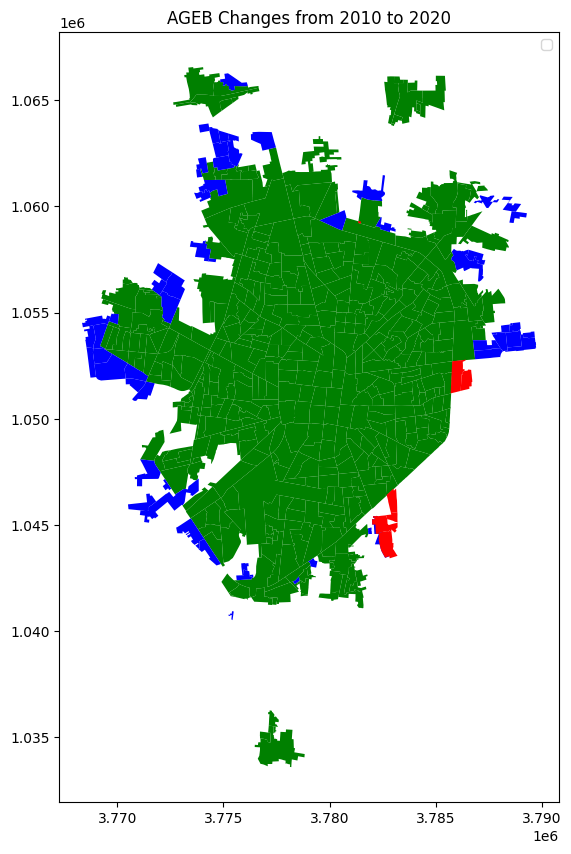

In [19]:
# Plot changes
plot_changes(remains_gdf, new_gdf, disappeared_gdf, 'AGEB Changes from 2010 to 2020')